**IMPORTANT: before starting, you need to run the following cell!**

In [ ]:
!pip install numpy matplotlib scipy pandas uncertainties

# A6 Simulation of particle interactions in a hadronic calorimeter

Computer modeling of the detector response to particle passage allows for the visualization of the passage of various particles through the calorimeter material in an interactive version and the calculation of particle energy losses in all parts of the calorimeter. A simple structure similar to the TileCal hadronic calorimeter [1], which is part of the ATLAS experiment [2] located at the LHC accelerator at CERN, is implemented in the simulation program. The simulation is programmed in Geant4 [3] and the ROOT [4] program is used to process the results. The calorimeter model, with a total length of $160~\mathrm{cm}$, consists of 80 layers of scintillator and iron, and its transverse dimensions are $80\times 80~\mathrm{cm}^2$.

# Calorimeters

Calorimeters measure the energy and direction of charged and neutral particles. Energy measurement is based on complete particle absorption. A high-energy particle entering the calorimeter interacts with its material, losing energy and creating secondary particles. These can create further particles in a cascade called a shower. The shower stops when the energy of each particle drops below a threshold. The original particle's direction is determined from the shower's transverse profile. There are homogeneous and sampling calorimeters. Sampling calorimeters use alternating layers of dense absorbers (like iron or lead) and active media (like ionization chambers or scintillators). Secondary particles are created in the absorber and deposit detectable energy in the active medium. The total signal is proportional to the original particle's energy.

### Particle interactions in the calorimeter

Particles interact with calorimeter material in several ways. They are ordered according to how efficiently they deposit energy in the calorimeter:

- Electromagnetic (EM) showers: Electrons ($e^-$), positrons ($e^+$), photons ($\gamma$), and neutral pions ($\pi^0$) create EM showers. High-energy photons convert to $e^-e^+$ pairs, which produce bremsstrahlung photons, repeating the process. $\pi^0$ decays rapidly into two photons, also creating an EM shower.

- Hadronic showers: All high-energy hadrons (except $\pi^0$) produce hadronic showers, which have two components:
  - An EM component from $\pi^0$ production.
  - A purely hadronic component, including secondary hadrons and "invisible" energy (energy used to break nuclei or carried away by non-interacting particles like neutrinos).
Because of the "invisible" energy, an electron generally produces a larger signal than a hadron with the same initial energy. Also, interaction lengths for electrons/photons are much smaller than for hadrons.

- Ionizing particles: Low-energy charged particles and muons lose energy primarily through ionization. Muons with energies of several hundred GeV deposit only a small fraction of their energy in calorimeters (about 1 GeV per meter in iron).

- Non-interacting particles: Neutrinos interact only weakly and have such long mean free paths that they almost never interact in a calorimeter.


### Calorimeter model

In our specific case, the calorimeter model consists of layers of iron and scintillator in a similar ratio to that found in the ATLAS experiment's hadronic calorimeter at CERN. Approximately 3-4% of the energy is lost as particles pass through the scintillator, and this portion represents the measurable energy from a physics standpoint. Part of the energy deposited in the scintillator is emitted as light, which can be guided via optical fibers to a photomultiplier. Here, the light signal is converted into an electrical charge, which is then further processed.

### Energy measurement and resolution

When measuring a particle's initial energy ($E_0$) in calorimeters, we use these principles:

- The number of particles at the shower maximum is proportional to the initial energy: $N_{max} \propto E_0$
- The total track length of charged particles is proportional to the initial energy: $L \propto E_0$
- The measurable signal is proportional to the total track length: $E_{dep} \propto L$

Thus, in an ideal calorimeter, the visible shower energy is proportional to the initial particle energy. This relationship differs for electromagnetic (EM) and hadronic showers.
In an ideal calorimeter (a perfect crystal), all absorbed energy is detected. The energy resolution is 
$$
\frac{\sigma(E_{dep})}{E_{dep}} \propto \frac{\sigma(N_{max})}{N_{max}} \propto \frac{1}{\sqrt{N_{max}}} \propto \frac{1}{\sqrt{E_0~[\mathrm{GeV}]}},
$$
often written as
$$
\frac{\sigma(E_{dep})}{E_{dep}} = \frac{a}{\sqrt{E_0~[\mathrm{GeV}]}},
$$
where $a$ is the stochastic/sampling term. In this text, $E_0$ is always given in GeV.

In a real detector, energy resolution is also affected by noise (scaling as $b/E_0$) and a constant term $c$ representing detector imperfections (inhomogeneity, calibration errors, shower leakage, and differences in EM and hadronic shower responses ($e/h \neq 1$)). The general formula for energy resolution is:
$$
\frac{\sigma(E_{dep})}{E_{dep}} = \sqrt{\frac{a^2}{E_0} \oplus \frac{b^2}{E_0^2} \oplus c^2},
$$
where $\oplus$ means the terms are added in quadrature. In simplified simulations where noise is negligible ($b = 0$), the formula becomes:
$$
\frac{\sigma(E_{dep})}{E_{dep}} = \sqrt{\frac{a^2}{E_0} + c^2}.
$$
A uniform calibration doesn't necessarily mean the constant term $c$ is zero.


# Analysis

Run the simulation program and observe the passage of various particles through the calorimeter. Analyze the energy deposition profiles, shower development, and other relevant quantities for different particle types and energies. Compare the behavior of electromagnetic and hadronic showers, as well as the interaction of muons and neutrinos with the calorimeter material. Investigate the stochastic fluctuations in shower development and the energy dependence of the observed properties.

Expected Observations:

- Electromagnetic Showers ($e^-$, $e^+$, $\gamma$): Observe the characteristic EM shower development: pair production, bremsstrahlung, and the relatively compact shower profile. Compare the showers produced by electrons, positrons, and photons.
- Hadronic Showers (protons, pions, etc.): Observe the more irregular and penetrating nature of hadronic showers compared to EM showers. Note the presence of secondary hadrons and the larger fluctuations in energy deposition.
- Muons: Observe the minimal interaction of muons, primarily through ionization. They will deposit significantly less energy than other charged particles of the same energy.
- Neutrinos: Observe the almost complete lack of interaction of neutrinos in the calorimeter.
- Stochastic Fluctuations: Observe the variations in shower development between identical runs.
- Charge Effects: Confirm there are no differences between positively and negatively charged particles.
- Energy Dependence: Analyze how the shower properties (length, width, energy deposition) change with increasing energy.

### Interactive simulation

$\color{red}{\textbf{Task:}}$ insert illustrations of the expected observations - images you produce using the simulation program, and an exemplary setting (particle type, and energy). Add a discussion of the observed phenomena under each image. Key questions to discuss are:
- What physical processes create the shower, and what particles are produced?
- How does the shower start, how does it evolve, and how does it end?
- Does some energy escape the calorimeter?

The following images must be included:
- Electromagnetic shower ($\sim 10~\mathrm{GeV}$),
- Hadronic interaction ($\sim 10~\mathrm{GeV}$)
- Muons: stopping (see below in the text), $\sim 10~\mathrm{GeV}$, bremsstrahlung,
- Decay $\pi^0 \rightarrow \gamma \gamma$ (see below in the text)
- Anything else that catches the student's eye...

Note that images are added using the markdown syntax `![title](image_path)`.

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ At what energy (roughly) will a muon still stop within the calorimeter? Formulate the answer and support it with an image.

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ What is roughly the critical energy of a muon at which it begins to create significant secondary showers. Formulate the answer and support it with an image.

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ Create a hadronic shower with two clearly separated 'cores' (primary and secondary interactions). Add an image with a brief description.

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ Decay $\pi^0 \rightarrow \gamma \gamma$; roughly at what energy can the showers from the two photons still be distinguished? Formulate the answer and support it with an image.

$\color{red}{\textbf{Solution:}}$

### Batch simulation

$\color{red}{\textbf{Task:}}$ Run the batch simulation for electron, charged pion and muon at a predefined fixed energy ($\gtrsim 10~\mathrm{GeV}$). The energy must be the same throughout all this exercise. Each particle is shot $N$ times to the calorimeter, and the calorimeter's response is analyzed statistically. The outcome of this task are three sets of plots (for electron, charged pion and muon) that you will insert here. Each set of plots consists of the following:
1. Histogram of the particles' energy deposition in iron
  - Note that this can be evaluated only in simulations, as iron doesn't produce a signal upon particle passage
2. Histogram of the particles' energy deposition in scintillator
3. Graph of the average particles' energy deposition in each iron calorimeter layer
4. Graph of the average particles' energy deposition in each scintillator calorimeter layer
5. Graph of the average particles' energy lateral leakage from each calorimeter layer (scintillator and iron)

Discuss the connections of observations from interactive simulations (shower shape, shower randomness, particle stopping or decay) with:
- The precision of energy measurement (resolution of the Gaussian in the scintillator: compare $e^-$ vs $\pi^+$)
- The total energy loss in the calorimeter (iron + scintillator)
- The longitudinal shower profile
- The total shower length
- Energy leakage from the calorimeter
- Energy loss of muons vs. muon stopping in the interactive simulation.

$\color{red}{\textbf{Solution:}}$

### Energy scan

Study the energy dependence of the calorimeter response and resolution for electrons or charged pions (choose one). Run the simulation for five energies in the range: $E_0 \in (8, 50)~\mathrm{GeV}$, e.g. $E_0 = 8, 13, 20, 30, 50~\mathrm{GeV}$.

$\color{red}{\textbf{Task:}}$ Run the simulation, read in its outcome, and generate a table summarizing it. You will find the outcome in the file `scan.txt`.
- You will get your own `scan.txt` file after running the simulation.
- For instructions how to make it accessible to this notebook, see the cell in the end of this notebook.

The table should contain the following five columns:
- Particle energy, $E_0$
- Average energy deposited in the scintilator, $E_\mathrm{dep}$, and its uncertainty
- Resolution of the energy deposited in the scintilator, $\sigma(E_\mathrm{dep})$, and its uncertainty

Notes on the file `scan.txt` format:
- Number of simulated events $N$ = `Number of events processed`.
- Particle energy $E_0$ = `Beam particle $E$`.
- Average deposited energy in iron or scintillator $E_\mathrm{dep}$ = `Deposited Energy`
  - It is the same quantity as Mean in upper histograms "1" and "2" in the previous "Batch simulation" task.
  - N.B. The Gaussian distribution has two parameters: $\mu$ and $\sigma$. Their estimates are usually denoted as $\hat{\mu}$ and $\hat{\sigma}$.
    - $\hat{\mu}$ is evaluated as the average of the $N$ measured values. Its uncertainty is estimated as $\hat{\sigma}/\sqrt{N}$.
    - $\hat{\sigma}$ is evaluated as the standard deviation of the $N$ measured values (see e.g. [this notebook](https://drive.google.com/file/d/1mGYAnvbuOJRIgQGiafFKDfvSh3O20hXq/view?usp=sharing)). Its uncertainty is estimated as $\hat{\sigma}/\sqrt{2N}$.
- Fluctuation of deposited energy in iron or scintillator $\sigma(E_\mathrm{dep})$ = `Resolution`
  - It is the same quantity as Sigma in upper histograms "1" and "2" in the previous "Batch simulation" task.

In [2]:
# Insert your code here.

from pandas import DataFrame

# Create a DataFrame
data = {'E_0'            : [x/1000 for x in [8000, 13000, 20000, 30000, 50000]], 
        'E_dep'          : [x/1000 for x in [194.88 , 317.83 , 490.75 , 742.06 , 1240]], 
        'E_dep_unc'      : [x/1000 for x in [0.48695, 0.62212, 0.79772, 1.03   , 1.40]],
        'sigma_E_dep'    : [x/1000 for x in [28.02  , 37.03  , 47.54  , 61.12  , 82.31]],
        'sigma_E_dep_unc': [x/1000 for x in [0.34554, 0.42843, 0.59638, 0.74750, 1.07]],
        }
display_names = {'E_0'            : 'E_0 [GeV]',
                 'E_dep'          : 'E_dep [GeV]',
                 'E_dep_unc'      : 'E_dep_unc [GeV]',
                 'sigma_E_dep'    : 'sigma_E_dep [GeV]',
                 'sigma_E_dep_unc': 'sigma_E_dep_unc [GeV]',
                }
df = DataFrame(data)
print(df.rename(columns=display_names))

   E_0 [GeV]  E_dep [GeV]  E_dep_unc [GeV]  sigma_E_dep [GeV]  \
0        8.0      0.19488         0.000487            0.02802   
1       13.0      0.31783         0.000622            0.03703   
2       20.0      0.49075         0.000798            0.04754   
3       30.0      0.74206         0.001030            0.06112   
4       50.0      1.24000         0.001400            0.08231   

   sigma_E_dep_unc [GeV]  
0               0.000346  
1               0.000428  
2               0.000596  
3               0.000748  
4               0.001070  


$\color{red}{\textbf{Task:}}$ For the scintillator, plot and fit the linear dependence of the response $E_\mathrm{dep}$ on $E_0$.
- Don't forget the uncertainties on the $y$-axis!
- When evaluating the fit function uncertainty, don't forget to take into account the full covariance matrix of the fitted parameters.
- Print the fit parameters and their uncertainties on the screen.

In [3]:
# You might need to install the uncertainties library. You can comment out the following line if you have installed it, already.
!pip install uncertainties

Defaulting to user installation because normal site-packages is not writeable


<class 'numpy.ndarray'>
[[ 9.16896016e-10 -1.42354310e-08]
 [-1.42354310e-08  3.22793073e-07]]


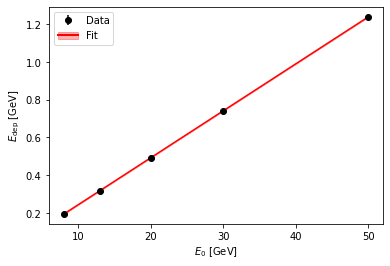

a = 0.024872+/-0.000030
b = -0.0049+/-0.0006 GeV


In [4]:
# Insert your code here.

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
import uncertainties
from uncertainties import ufloat, unumpy

def plot(x, y, y_err, x_fit, y_fit, y_fit_lower, y_fit_upper, xlabel, ylabel):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt='o', label='Data', color='black')

    # draw the fit function and its uncertainty band
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.3)

    # create a legend entry for the fit function and its uncertainty band
    line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
    band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

    # get the current legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

    # finally, plot
    plt.plot(x_fit, y_fit, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return


# define the linear fit function
def linear(x, a, b):
    return a*x + b

# fit the linear function to the data
nom_ab, cov_ab = curve_fit(linear, df['E_0'], df['E_dep'], sigma=df['E_dep_unc'], absolute_sigma=True)

# to draw the fit function and its uncertainty band, we need to evaluate the fit function at many points
x = np.linspace(df['E_0'].min(), df['E_0'].max(), 100)
a, b = uncertainties.correlated_values(nom_ab, cov_ab)
y_fit_uarray = linear(x, a, b)
y_fit     = unumpy.nominal_values(y_fit_uarray)
sigma_fit = unumpy.std_devs      (y_fit_uarray)
print(type(cov_ab))
print(cov_ab)

# plot the data and the fit function with its uncertainty band
plot(df['E_0'], df['E_dep'], df['E_dep_unc'], x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, '$E_0$ [GeV]', '$E_\mathrm{dep}$ [GeV]')

# print the fit parameters
print('a =', a)
print('b =', b,'GeV')

$\color{red}{\textbf{Task:}}$ Calculate the quality of the fit ($\chi^2/\mathrm{NDF}$), and print it on the screen.

In [5]:
# Calcutate the chi2 value and the degrees of freedom

# Calculate residuals
residuals = df['E_dep'] - linear(df['E_0'], *nom_ab)

# Calculate chi-squared
chi_squared = np.sum((residuals / df['E_dep_unc']) ** 2)

# Degrees of freedom
degrees_of_freedom = len(df['E_0']) - len(nom_ab) 

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {chi_squared / degrees_of_freedom}")


Chi-squared: 10.156640923793887
Degrees of freedom: 3
Reduced chi-squared: 3.3855469745979625


$\color{red}{\textbf{Task:}}$ For the scintillator, fit and plot the dependence of the resolution $\sigma(E_\mathrm{dep})/E_\mathrm{dep}$ on $E_0$.
- Don't forget the uncertainties on the $y$-axis!
- When evaluating the fit function uncertainty, don't forget to take into account the full covariance matrix of the fitted parameters.
- Print the fit parameters and their uncertainties on the screen.

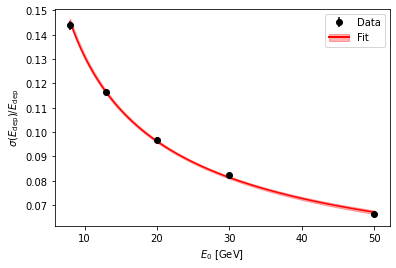

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
# Insert your code here.

from IPython.display import display, Latex

# define the resolution function
def resolution(E_0, a, c):
    return np.sqrt(a**2/E_0 + c**2)

# calculate the the relative energy resolution and its uncertainty
E_dep_unumpy       = unumpy.uarray(df['E_dep']      , df['E_dep_unc'])
sigma_E_dep_unumpy = unumpy.uarray(df['sigma_E_dep'], df['sigma_E_dep_unc'])
rel_res_unc        = sigma_E_dep_unumpy / E_dep_unumpy

# fit the resolution function to the data
nom_ac, cov_ac = curve_fit(resolution, df['E_0'], unumpy.nominal_values(rel_res_unc), sigma=unumpy.std_devs(rel_res_unc), absolute_sigma=True)

# to draw the fit function and its uncertainty band, we need to evaluate the fit function at many points
x = np.linspace(df['E_0'].min(), df['E_0'].max(), 100)
a, c = uncertainties.correlated_values(nom_ac, cov_ac)
wrapped_resolution = uncertainties.wrap(resolution)
y_fit_list = [wrapped_resolution(x, a, c) for x in x]
y_fit     = np.array([y.nominal_value for y in y_fit_list])
sigma_fit = np.array([y.std_dev       for y in y_fit_list])

# plot the data and the fit function with its uncertainty band
plot(df['E_0'], unumpy.nominal_values(rel_res_unc), unumpy.std_devs(rel_res_unc), x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, '$E_0$ [GeV]', '$\sigma(E_\mathrm{dep}) / E_\mathrm{dep}$')

# print the fit parameters
display(Latex(f'$a = {a}~\mathrm{{GeV}}^{{1/2}}$'))
display(Latex(f'$c = {c}$'))

$\color{red}{\textbf{Task:}}$ Calculate the quality of the fits ($\chi^2/\mathrm{NDF}$), and print it on the screen.

In [7]:
# Calcutate the chi2 value and the degrees of freedom

# Calculate residuals
residuals = df['sigma_E_dep'] / df['E_dep'] - resolution(df['E_0'], *nom_ac)

# Calculate chi-squared
chi_squared = np.sum((residuals / (df['sigma_E_dep_unc'] / df['E_dep'])) ** 2)

# Degrees of freedom
degrees_of_freedom = len(df['E_0']) - len(nom_ac) 

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {chi_squared / degrees_of_freedom}")


Chi-squared: 2.903564887891477
Degrees of freedom: 3
Reduced chi-squared: 0.9678549626304923


$\color{red}{\textbf{Task:}}$ Discuss the numerical values of the fitted parameters in the protocol: 
- Is $c$ compatible with zero?
- Does $a$ correspond in order of magnitude to the values from the PDG tables [5]?

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ Print the content of the file `scan.txt` in the protocol.

In [8]:
# Feel free to modify to modify the following code if it does not work for you.
# There are many possible locations of the scan.txt file.

# # 1) Print just the example scan.txt file.
# !wget https://raw.githubusercontent.com/vojtechpleskot/physicslab4/main/A6/scan.txt
# with open('scan.txt', 'r') as file:
#     print(file.read())

# # 2) If it is on your Google Drive:
# #    In Google Colab, you have to mount your Google Drive to the Colab environment.
# #    Note that you will be asked to grant permission to access your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

# #    In Google Colab, you have to read the data from your Google Drive. Change the path to the file below!
# with open('/content/drive/MyDrive/ipnp/physics_labs/2024/scan.txt', 'r') as file:
#     print(file.read())


# # 3) If it is on your local file system and you are running Jupyter Notebook on your local machine:
# #    - Change the path to the file below!
# with open('scan.txt', 'r') as file:
#     print(file.read())

# Literature

[1] ATLAS Collaboration, Readiness of the ATLAS Tile Calorimeter for LHC collisions, Eur. Phys. J. C 70 (2010) s. 1193–1236, arXiv: 1007.5423

[2] ATLAS Collaboration), The ATLAS Experiment at the CERN Large Hadron Collider, JINST 3 (2008) S08003, http://cdsweb.cern.ch/record/1129811, https://atlas.cern

[3] Geant4 Collaboration, Geant4 - A Simulation Toolkit, Nucl. Instrum. Meth. A 506 (2003) 250-303, https://geant4.web.cern.ch 

[4] R. Brun, F. Rademakers a S. Panacek, ROOT, an object oriented data analysis framework, CERN School of Computing (CSC 2000) (2000) s. 11–42, https://root.cern.ch

[5] Particle Data Group, The Review of Particle Physics (2024), to be published in Phys. Rev. D 110 (2024) s. 030001, Section 35.10 ’Calorimeters’ in https://pdg.lbl.gov/2024/web/viewer.html?file=../reviews/rpp2024-rev-particle-detectors-accel.pdf